In [1]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  pydataset import data
import wrangle
import explore
import prepare
import evaluate
import model
import math
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


## Acquire data

In [2]:
df = data('Salaries')

In [3]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500


In [4]:
df.shape

(397, 6)

In [5]:
data ("Salaries", show_doc=True)

Salaries

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Salaries for Professors

### Description

The 2008-09 nine-month academic salary for Assistant Professors, Associate
Professors and Professors in a college in the U.S. The data were collected as
part of the on-going effort of the college's administration to monitor salary
differences between male and female faculty members.

### Usage

    Salaries

### Format

A data frame with 397 observations on the following 6 variables.

`rank`

a factor with levels `AssocProf` `AsstProf` `Prof`

`discipline`

a factor with levels `A` (“theoretical” departments) or `B` (“applied”
departments).

`yrs.since.phd`

years since PhD.

`yrs.service`

years of service.

`sex`

a factor with levels `Female` `Male`

`salary`

nine-month salary, in dollars.

### References

Fox J. and Weisberg, S. (2011) _An R Companion to Applied Regression_, Second
Edition Sage.




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 1 to 397
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 21.7+ KB


## Prepare data

In [7]:
#using my function to check nulls, duplicates
wrangle.miss_dup_values(df)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.
  
** There are 4 duplicate rows that represents 1.01% of total Values**


,Missing Values,% of Total Values


In [8]:
#drop duplicates
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 1 to 397
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           393 non-null    object
 1   discipline     393 non-null    object
 2   yrs.since.phd  393 non-null    int64 
 3   yrs.service    393 non-null    int64 
 4   sex            393 non-null    object
 5   salary         393 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 21.5+ KB


In [10]:
#replace '.' by '_' and removing white spaces
df.columns.str.replace('.','_').str.strip()

Index(['rank', 'discipline', 'yrs_since_phd', 'yrs_service', 'sex', 'salary'], dtype='object')

In [11]:
df.columns = df.columns.str.replace('.','_').str.strip()

In [12]:
df.head()

,rank,discipline,yrs_since_phd,yrs_service,sex,salary
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500


In [13]:
# unique values

In [14]:
columns = df.columns.tolist()
print( 'Columns')
print(" ")
cat_list = []
for col in columns:
    print(f'{col} -- >{df[col].nunique()} unique values')
    if df[col].nunique() < 30:
        cat_list.append(col)
    print(" ")

Columns
 
rank -- >3 unique values
 
discipline -- >2 unique values
 
yrs_since_phd -- >53 unique values
 
yrs_service -- >52 unique values
 
sex -- >2 unique values
 
salary -- >371 unique values
 


In [15]:
#categorical variables 
for l in cat_list:
    print(l)
    print(df[l].value_counts())
    print("--------------------------- ")
    print(" ")

rank
Prof         266
AssocProf     64
AsstProf      63
Name: rank, dtype: int64
--------------------------- 
 
discipline
B    212
A    181
Name: discipline, dtype: int64
--------------------------- 
 
sex
Male      354
Female     39
Name: sex, dtype: int64
--------------------------- 
 


In [16]:
#encode sex
# 0 = "Male"
# 1 = 'Female'
df['sex'] = df['sex'].replace({'Male': 0, 'Female': 1})

In [17]:
#encode discipline
# 0 = A
# 1 = B
df['discipline'] = df['discipline'].replace({'A': 0, 'B': 1})

In [18]:
dumm_list = ['rank']
#create dummy for rank
dummy_df = pd.get_dummies(df[dumm_list])
 ## Concatenate the dummy_df dataframe above with the original df
df = pd.concat([df, dummy_df], axis=1)

In [19]:
# drop the columns that we already use to create dummy_df
df.drop(columns=dumm_list, inplace=True)

In [20]:
df.head()

,discipline,yrs_since_phd,yrs_service,sex,salary,rank_AssocProf,rank_AsstProf,rank_Prof
1,1,19,18,0,139750,0,0,1
2,1,20,16,0,173200,0,0,1
3,1,4,3,0,79750,0,1,0
4,1,45,39,0,115000,0,0,1
5,1,40,41,0,141500,0,0,1


In [21]:
df.columns = df.columns.str.lower()

<Figure size 576x432 with 0 Axes>

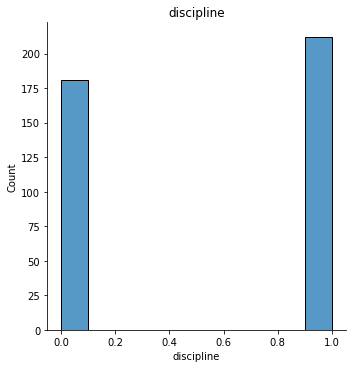

<Figure size 576x432 with 0 Axes>

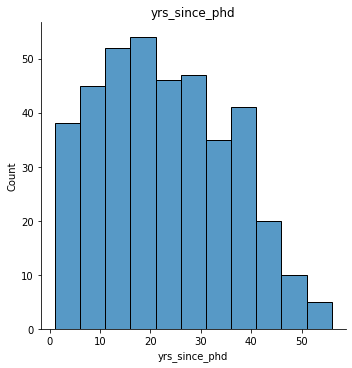

<Figure size 576x432 with 0 Axes>

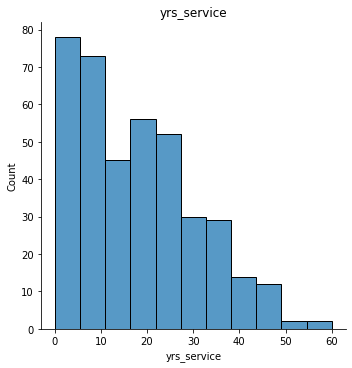

<Figure size 576x432 with 0 Axes>

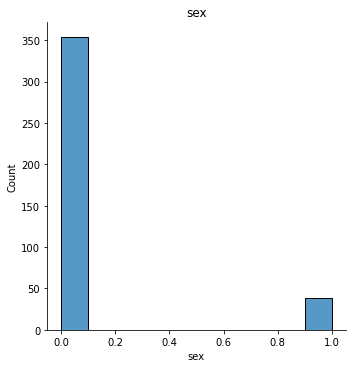

<Figure size 576x432 with 0 Axes>

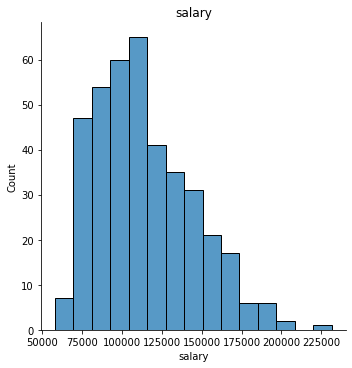

<Figure size 576x432 with 0 Axes>

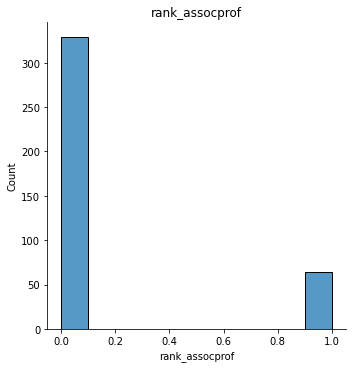

<Figure size 576x432 with 0 Axes>

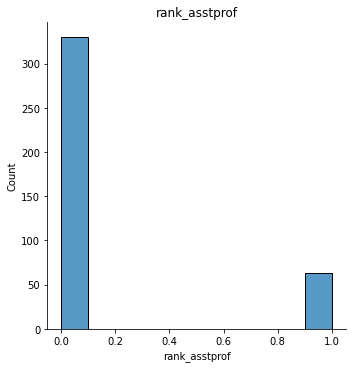

<Figure size 576x432 with 0 Axes>

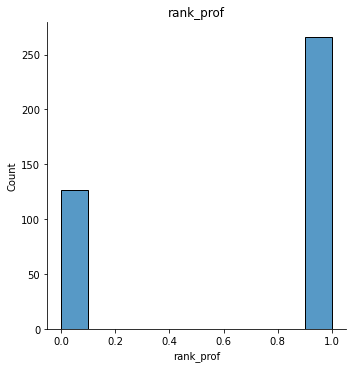

In [22]:
explore.distribution_single_var(df)

## split

In [23]:
train, validate, test = wrangle.split_data(df)

train -> (219, 8)
validate -> (95, 8)
test -> (79, 8)


In [24]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.split_Xy (train, validate, test, 'salary' )

X_train -> (219, 7)               y_train->(219,)
X_validate -> (95, 7)         y_validate->(95,) 
X_test -> (79, 7)                  y_test>(79,)


## scale

In [25]:
X_train.head()

,discipline,yrs_since_phd,yrs_service,sex,rank_assocprof,rank_asstprof,rank_prof
252,0,20,8,0,0,0,1
362,0,23,15,1,0,0,1
220,1,13,11,0,0,0,1
273,0,4,1,0,0,1,0
296,0,40,36,0,0,0,1


In [26]:
col = X_train.columns.tolist()
col



['discipline',
 'yrs_since_phd',
 'yrs_service',
 'sex',
 'rank_assocprof',
 'rank_asstprof',
 'rank_prof']

In [27]:
X_train_scaled, X_validate_scaled, X_test_scaled = prepare.scaled_mimmax (col, X_train, X_validate, X_test)

In [28]:
X_train_scaled.head()

,discipline,yrs_since_phd,yrs_service,sex,rank_assocprof,rank_asstprof,rank_prof
252,0.0,0.345455,0.133333,0.0,0.0,0.0,1.0
362,0.0,0.400000,0.250000,1.0,0.0,0.0,1.0
220,1.0,0.218182,0.183333,0.0,0.0,0.0,1.0
273,0.0,0.054545,0.016667,0.0,0.0,1.0,0.0
296,0.0,0.709091,0.600000,0.0,0.0,0.0,1.0


In [29]:
X_train_scaled.shape

(219, 7)

## Explore

In [30]:
# in the explore I want to explore with my target

In [31]:
y_train.head()

252    102000
362    109646
220    119500
273     73000
296     97150
Name: salary, dtype: int64

In [32]:
 df2 = pd.DataFrame( {'salary': y_train})

In [33]:
df2.isnull().sum()

salary    0
dtype: int64

In [34]:
df2.shape

(219, 1)

In [35]:
X_train_scaled.shape

(219, 7)

In [36]:
train_scaled = pd.concat([X_train_scaled, df2 ], axis= 1 )



In [37]:
train_scaled.head()

,discipline,yrs_since_phd,yrs_service,sex,rank_assocprof,rank_asstprof,rank_prof,salary
252,0.0,0.345455,0.133333,0.0,0.0,0.0,1.0,102000
362,0.0,0.400000,0.250000,1.0,0.0,0.0,1.0,109646
220,1.0,0.218182,0.183333,0.0,0.0,0.0,1.0,119500
273,0.0,0.054545,0.016667,0.0,0.0,1.0,0.0,73000
296,0.0,0.709091,0.600000,0.0,0.0,0.0,1.0,97150


In [38]:
train_scaled['salary'].isnull().sum()

0

In [39]:
X_train_scaled.shape

(219, 7)

In [40]:
train_scaled.columns

Index(['discipline', 'yrs_since_phd', 'yrs_service', 'sex', 'rank_assocprof',
       'rank_asstprof', 'rank_prof', 'salary'],
      dtype='object')

In [41]:
cat = ['discipline',  'sex', 'rank_assocprof', 'rank_asstprof', 'rank_prof']

Discrete with Continuous


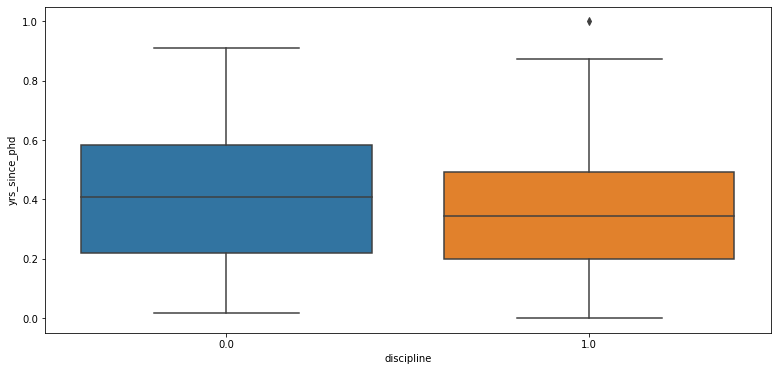

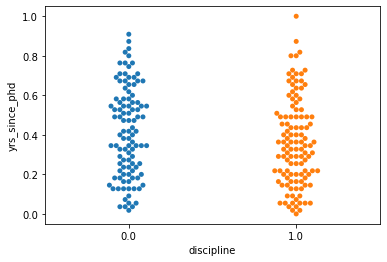

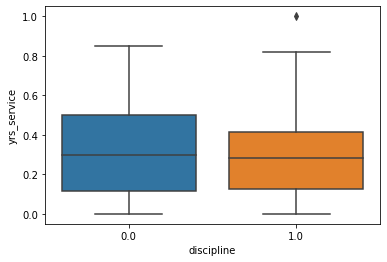

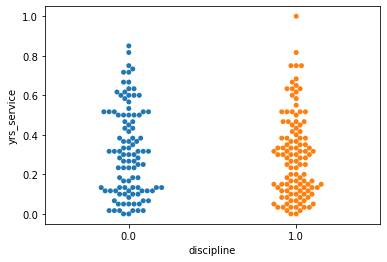

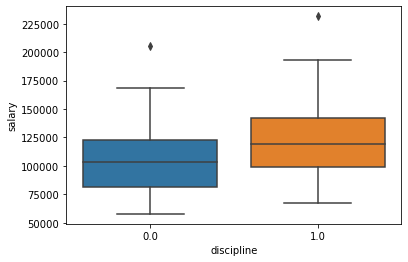

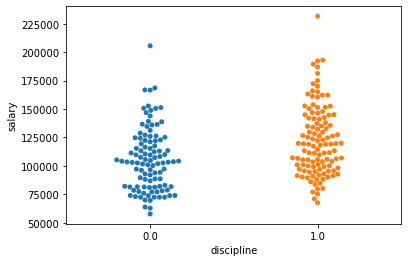

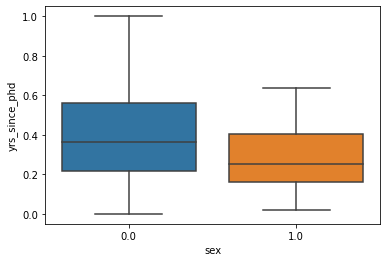

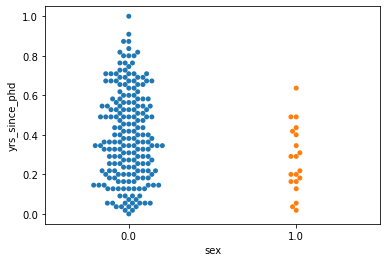

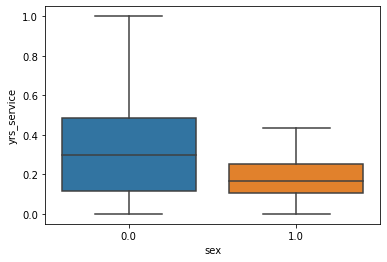

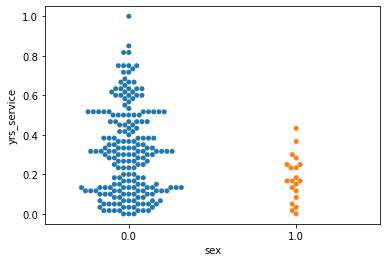

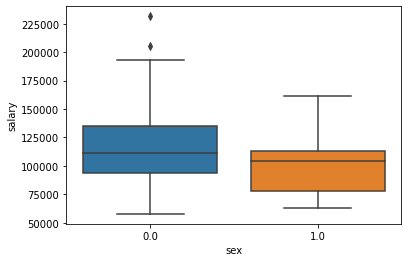

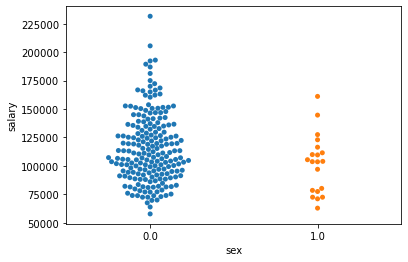

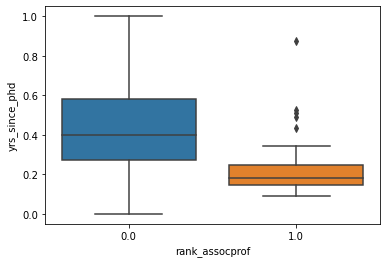

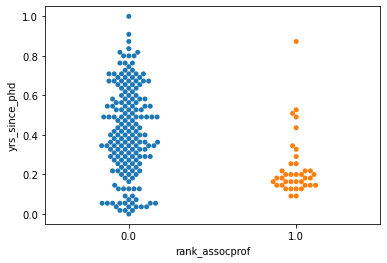

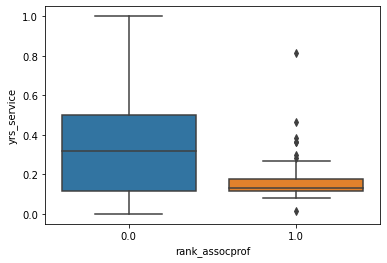

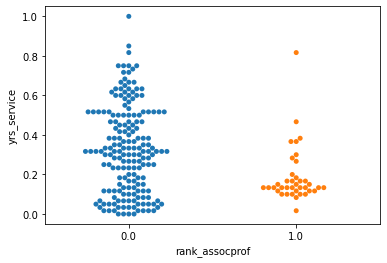

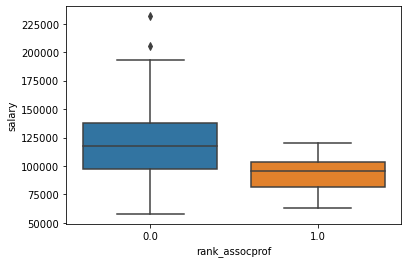

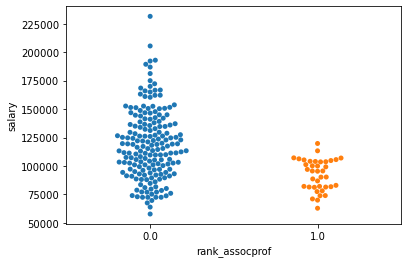

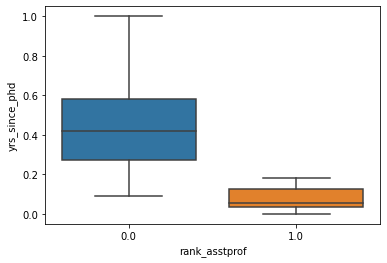

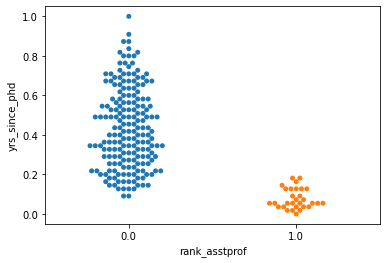

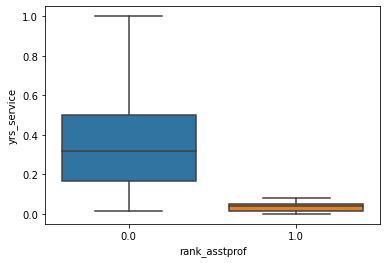

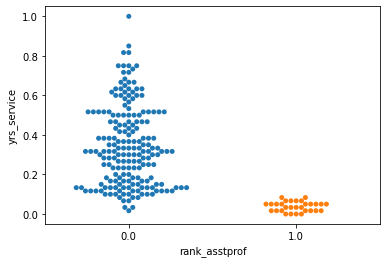

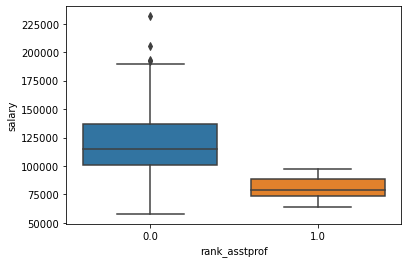

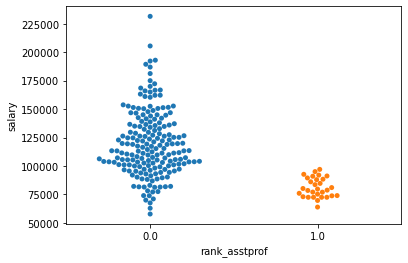

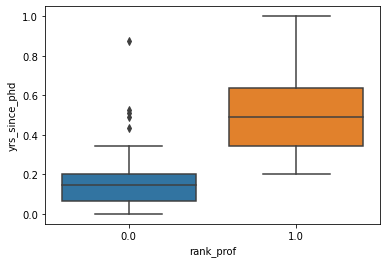

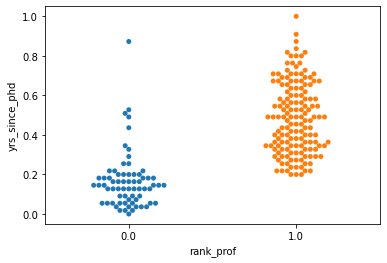

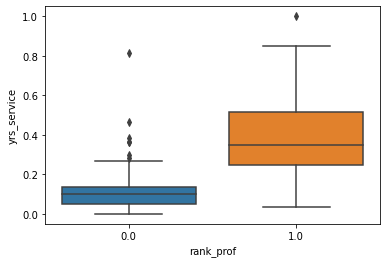

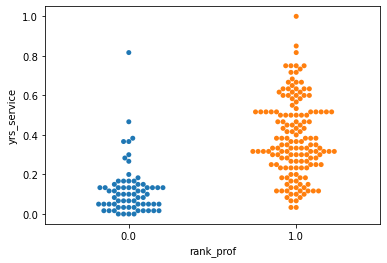

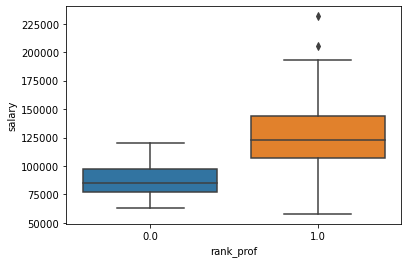

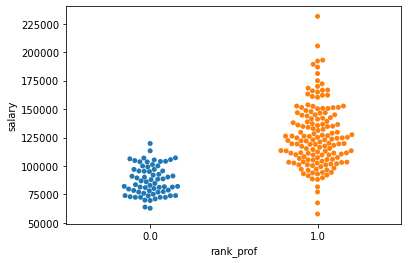

Continuous with Continuous


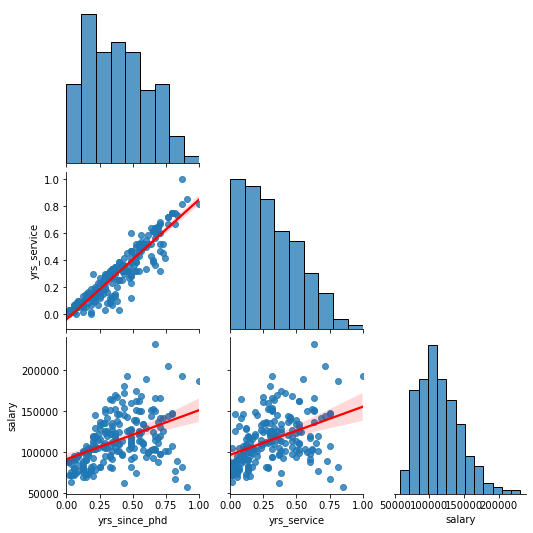

In [42]:
explore.plot_categorical_and_continuous_vars(train_scaled, cat, ['yrs_since_phd','yrs_service','salary'])

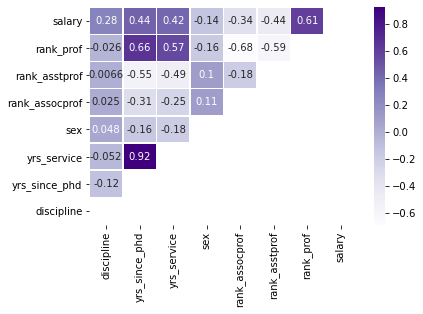

In [43]:
 explore.heatmap (train_scaled)

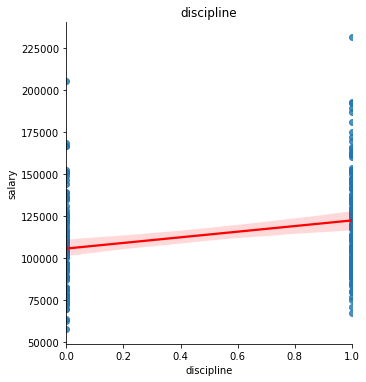

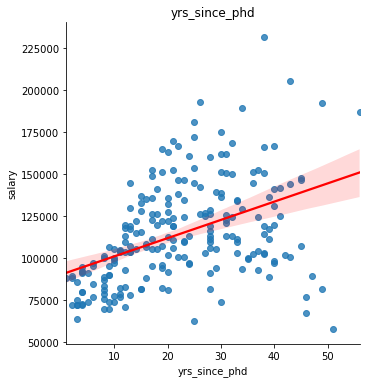

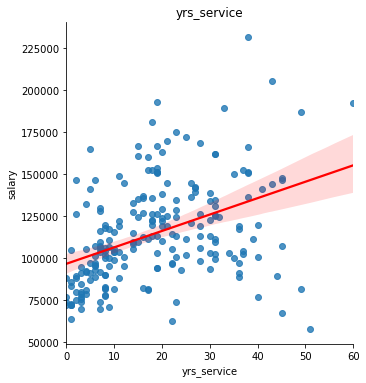

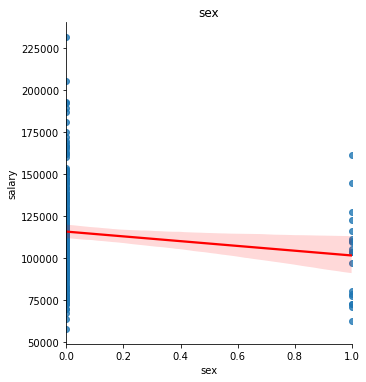

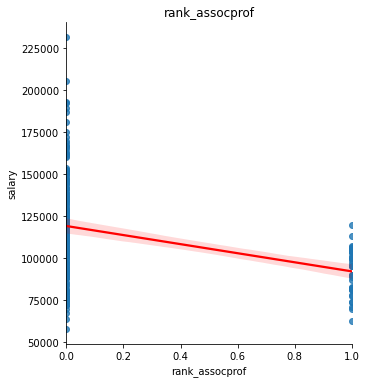

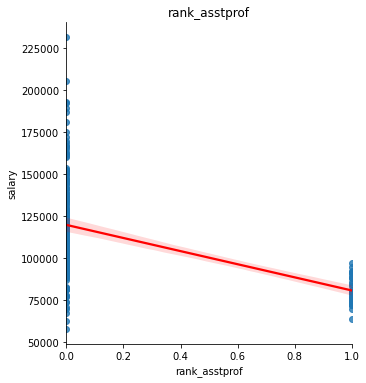

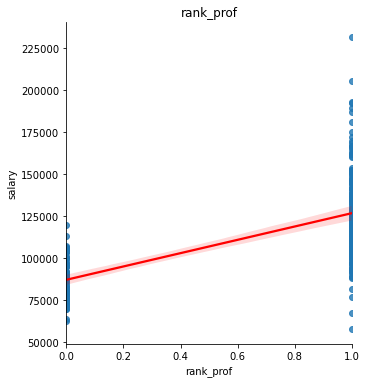

In [44]:
explore.plot_variable_pairs(train, 'salary')

## Modeling

**Target Variable/y**

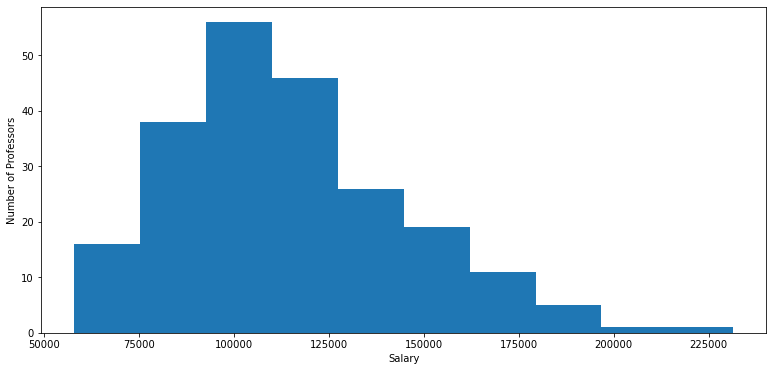

In [45]:
plt.figure(figsize=(13, 6))
plt.hist(y_train)
plt.xlabel("Salary")
plt.ylabel("Number of Professors")
plt.show()

In [46]:
##feature engineering

In [47]:
model.select_kbest(X_train_scaled, y_train, 2)

The top 2 selected feautures based on the SelectKBest class are: ['yrs_since_phd', 'rank_prof']


In [48]:
model.select_rfe (X_train_scaled, y_train, 2)

The top 2 selected feautures based on the the RFE class class are: ['discipline', 'rank_prof']
discipline        1
rank_prof         1
yrs_service       2
rank_asstprof     3
rank_assocprof    4
sex               5
yrs_since_phd     6
dtype: int64


In [49]:
#conver y_train y _ validate to df
y_train = pd.DataFrame( {'actual': y_train})
y_validate = pd.DataFrame( {'actual': y_validate})

In [50]:
y_train.mean()

actual    114530.123288
dtype: float64

In [51]:
y_train['actual'].mean()

114530.12328767123

In [52]:
# I can use my function evaluate.baseline_mean_errors(y_train, 'actual').
#it calculates the baseline (mean) and add it to my df, and calculate MRSE

In [53]:
# #calculate baseline
# baseline = y_train['actual'].mean()
# #add baseline to y_train
# y_train['yhat_baseline'] = baseline
#calculate RMSE for the baseline
#math.sqrt(mean_squared_error(y_train.actual, y_train.baseline))

In [54]:
b= evaluate.baseline_mean_errors(y_train, 'actual')
b

{'sse': 199099283619.6712,
 'mse': 909129148.9482703,
 'rmse': 30151.76858740247,
 'tss': 199099283619.6712,
 'ess': 0.0,
 'r2': 0.0}

In [55]:
y_train.head()

,actual,yhat_baseline
252,102000,114530.123288
362,109646,114530.123288
220,119500,114530.123288
273,73000,114530.123288
296,97150,114530.123288


In [56]:
b_eva= evaluate.baseline_mean_errors(y_validate, 'actual')
b_eva

{'sse': 90636527761.95789,
 'mse': 954068713.2837672,
 'rmse': 30888.002740283602,
 'tss': 90636527761.95789,
 'ess': 0.0,
 'r2': 0.0}

In [57]:
X_train_scaled.head()

,discipline,yrs_since_phd,yrs_service,sex,rank_assocprof,rank_asstprof,rank_prof
252,0.0,0.345455,0.133333,0.0,0.0,0.0,1.0
362,0.0,0.400000,0.250000,1.0,0.0,0.0,1.0
220,1.0,0.218182,0.183333,0.0,0.0,0.0,1.0
273,0.0,0.054545,0.016667,0.0,0.0,1.0,0.0
296,0.0,0.709091,0.600000,0.0,0.0,0.0,1.0


**model 1 LinearRegression (OLS)**

In [58]:
#model 1
# create the model object
model1 = LinearRegression()

In [59]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
model1.fit(X_train_scaled, y_train.actual)

LinearRegression()

In [60]:
model1

LinearRegression()

In [61]:
# predict train
y_train['model1'] = model1.predict(X_train_scaled)

In [62]:
y_train.head()

,actual,yhat_baseline,model1
252,102000,114530.123288,114429.707589
362,109646,114530.123288,111728.304397
220,119500,114530.123288,133007.750490
273,73000,114530.123288,71785.927632
296,97150,114530.123288,120704.400396


### calculate RMSE


**- train**

In [63]:
#rmse manually
math.sqrt(mean_squared_error(y_train.actual, y_train.model1))

21906.046065858995

In [64]:
#using my function
mod1_train= evaluate.regression_errors (y_train, 'actual', 'model1')
mod1_train['rmse']

21906.046065858995

**- validate**

In [65]:
X_validate_scaled.shape

(95, 7)

In [66]:
X_train_scaled.shape

(219, 7)

In [67]:
# predict validate
y_validate['model1'] = model1.predict(X_validate_scaled)

In [68]:
#using my function
mod1_validate= evaluate.regression_errors (y_validate, 'actual', 'model1')
mod1_validate['rmse']

25604.131829028604

### Lasso

In [69]:
# create the model object
lars = LassoLars(alpha=1.0)

In [70]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.actual)

LassoLars()

In [71]:
# predict train
y_train['Model2'] = lars.predict(X_train_scaled)

In [72]:
#using my function
mod2_train= evaluate.regression_errors (y_train, 'actual', 'Model2')
mod2_train['rmse']

21906.06237489105

In [73]:
# predict validate
y_validate['model2'] = lars.predict(X_validate_scaled)

In [74]:
#using my function
mod2_validate= evaluate.regression_errors (y_validate, 'actual', 'model2')
mod2_validate['rmse']

25598.79040661599

### TweedieRegressor (GLM)

In [75]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

In [76]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.actual)

TweedieRegressor(alpha=0, power=1)

In [77]:
# predict train
y_train['model3_glm'] = glm.predict(X_train_scaled)

In [78]:
# evaluate: rmse
mod3_train =  evaluate.regression_errors (y_train, 'actual', 'model3_glm')

In [79]:
mod3_train['rmse']

21873.793180374454

In [80]:
# predict validate
y_validate['model3'] = glm.predict(X_validate_scaled)

# evaluate: rmse
mod3_validate =  evaluate.regression_errors (y_validate, 'actual', 'model3')
mod3_validate['rmse']

25685.259291833914

### PolynomialFeatures

In [81]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [82]:
# create the model object
lm4 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm4.fit(X_train_degree2, y_train.actual)

# predict train
y_train['model4'] = lm4.predict(X_train_degree2)

In [83]:
# evaluate: rmse
mod4_train =  evaluate.regression_errors (y_train, 'actual', 'model4')
mod4_train['rmse']

32548.951698218607

In [84]:
# predict validate
y_validate['model4'] = lm4.predict(X_validate_degree2)

# evaluate: rmse
mod4_validate =  evaluate.regression_errors (y_validate, 'actual', 'model4')
mod4_validate['rmse']

44079.056184613524

In [85]:
y_validate.head()

,actual,yhat_baseline,model1,model2,model3,model4
100,106689,111964.821053,136384.781393,136347.302945,137475.450730,159744.0
369,131950,111964.821053,119359.179220,119358.622403,118289.543699,110592.0
179,147349,111964.821053,133690.731825,133663.013739,134522.651893,141312.0
219,109650,111964.821053,95723.691756,95756.910068,94505.694996,118784.0
177,95436,111964.821053,99988.357325,99979.384951,98591.233354,124928.0


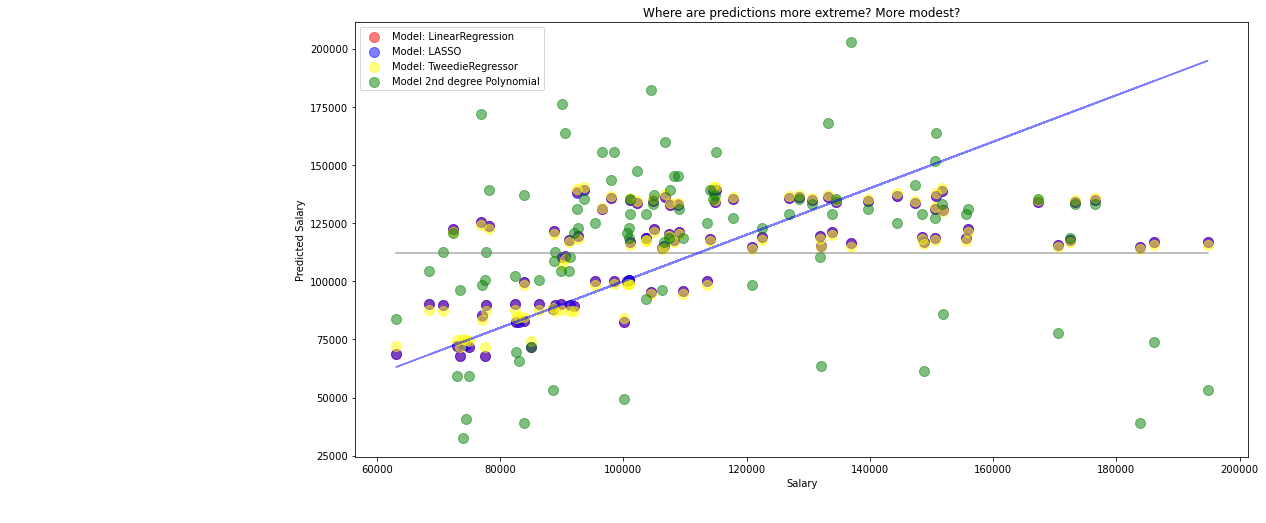

In [86]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.actual, y_validate.yhat_baseline, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.actual, y_validate.actual, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.actual, y_validate.model1, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.actual, y_validate.model2, 
            alpha=.5, color="blue", s=100, label="Model: LASSO")
plt.scatter(y_validate.actual, y_validate.model3, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.actual, y_validate.model4, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Salary")
plt.ylabel("Predicted Salary")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

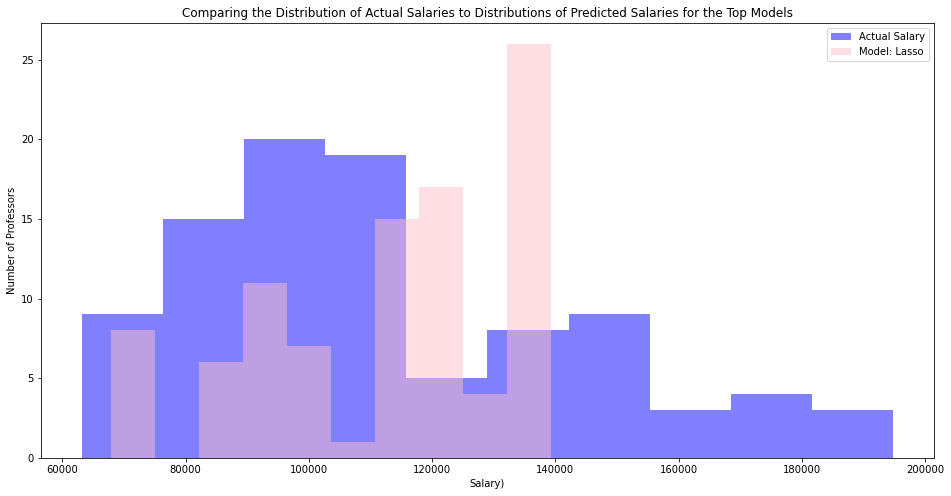

In [87]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.actual, color='blue', alpha=.5, label="Actual Salary")
# plt.hist(y_validate.model1, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.model2, color='pink', alpha=.5, label="Model: Lasso")
# plt.hist(y_validate.model3, color='yellow', alpha=.5, label="Model: TweedieRegressor")
# plt.hist(y_validate.model4, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Salary)")
plt.ylabel("Number of Professors")
plt.title("Comparing the Distribution of Actual Salaries to Distributions of Predicted Salaries for the Top Models")
plt.legend()
plt.show()

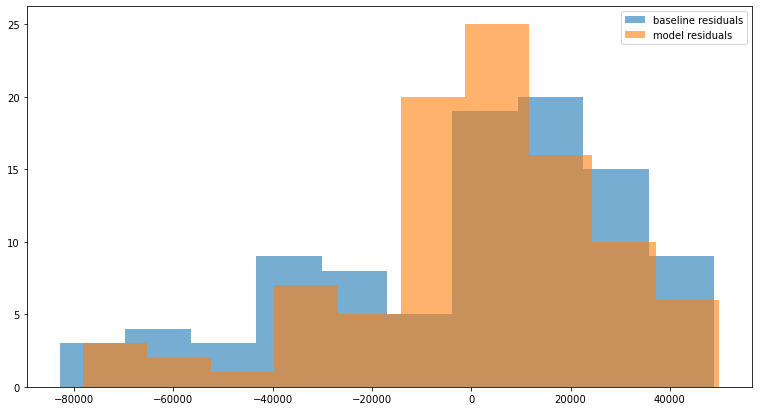

In [88]:
evaluate.plot_residuals(y_validate, 'actual', 'model2')